In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [7]:
wine = pd.read_csv('winequality-red.csv', delimiter=";")

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


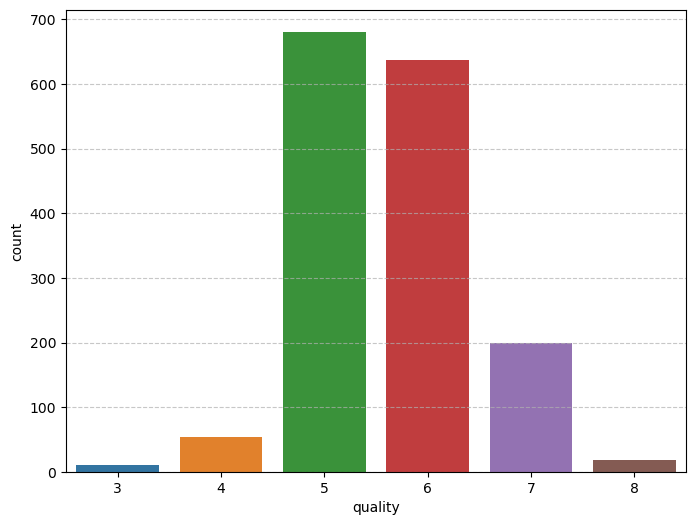

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=wine, x='quality')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [87]:
wine1 = wine.copy()

In [88]:
wine1['quality'] = pd.to_numeric(wine1['quality'])

In [89]:
wine1['quality'].dtype

dtype('int64')

In [90]:
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
wine1['quality'] = scaler_minmax.fit_transform(wine1[['quality']])

In [91]:
wine1['quality'].head()

0    0.4
1    0.4
2    0.4
3    0.6
4    0.4
Name: quality, dtype: float64

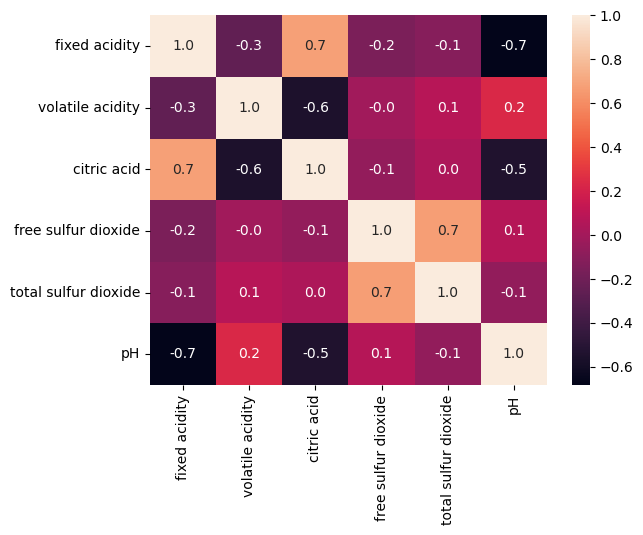

In [93]:
wine1_subset = wine1[['fixed acidity', 'volatile acidity', 'citric acid', 
                      'free sulfur dioxide', 'total sulfur dioxide', 'pH']]

corr_mat = wine1_subset.corr()
sns.heatmap(corr_mat, annot=True, fmt='.1f')
plt.show()

In [94]:
X = wine1[['citric acid', 'fixed acidity', 'free sulfur dioxide']]
y = wine1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [95]:
reg = linear_model.LinearRegression()

In [96]:
reg.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = reg.predict(X_test)

In [100]:
mse = mean_squared_error(y_test, y_pred)
rmse  = mean_squared_error(y_test, y_pred, squared=False)

print("mse: ", mse)
print("rmse", rmse)

mse:  0.025616616892637334
rmse 0.1600519193656775


In [52]:
wine2 = wine.copy()

In [53]:
wine2['quality'] = pd.cut(wine2['quality'], bins=3, labels=['bad', 'medium', 'great'])

In [54]:
wine2['quality'].head()

0    medium
1    medium
2    medium
3    medium
4    medium
Name: quality, dtype: category
Categories (3, object): ['bad' < 'medium' < 'great']

In [67]:
wine2[['alcohol', 'pH', 'sulphates', 'residual sugar']] = wine1[['alcohol', 'pH', 'sulphates', 'residual sugar']].apply(lambda x: x.astype('category').cat.codes)

In [68]:
wine2[['alcohol', 'pH', 'sulphates', 'residual sugar']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   alcohol         1599 non-null   int8 
 1   pH              1599 non-null   int8 
 2   sulphates       1599 non-null   int8 
 3   residual sugar  1599 non-null   int8 
dtypes: int8(4)
memory usage: 6.4 KB


In [69]:
X = wine2[['alcohol', 'pH', 'sulphates', 'residual sugar']]
y = wine2['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
clf = DecisionTreeClassifier(random_state=0)

In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [77]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- alcohol <= 39.50
|   |--- alcohol <= 25.50
|   |   |--- residual sugar <= 4.50
|   |   |   |--- sulphates <= 43.50
|   |   |   |   |--- pH <= 58.50
|   |   |   |   |   |--- pH <= 16.50
|   |   |   |   |   |   |--- residual sugar <= 3.50
|   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |--- residual sugar >  3.50
|   |   |   |   |   |   |   |--- class: great
|   |   |   |   |   |--- pH >  16.50
|   |   |   |   |   |   |--- residual sugar <= 1.50
|   |   |   |   |   |   |   |--- pH <= 38.00
|   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |   |--- pH >  38.00
|   |   |   |   |   |   |   |   |--- sulphates <= 11.00
|   |   |   |   |   |   |   |   |   |--- class: great
|   |   |   |   |   |   |   |   |--- sulphates >  11.00
|   |   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |--- residual sugar >  1.50
|   |   |   |   |   |   |   |--- pH <= 53.00
|   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |

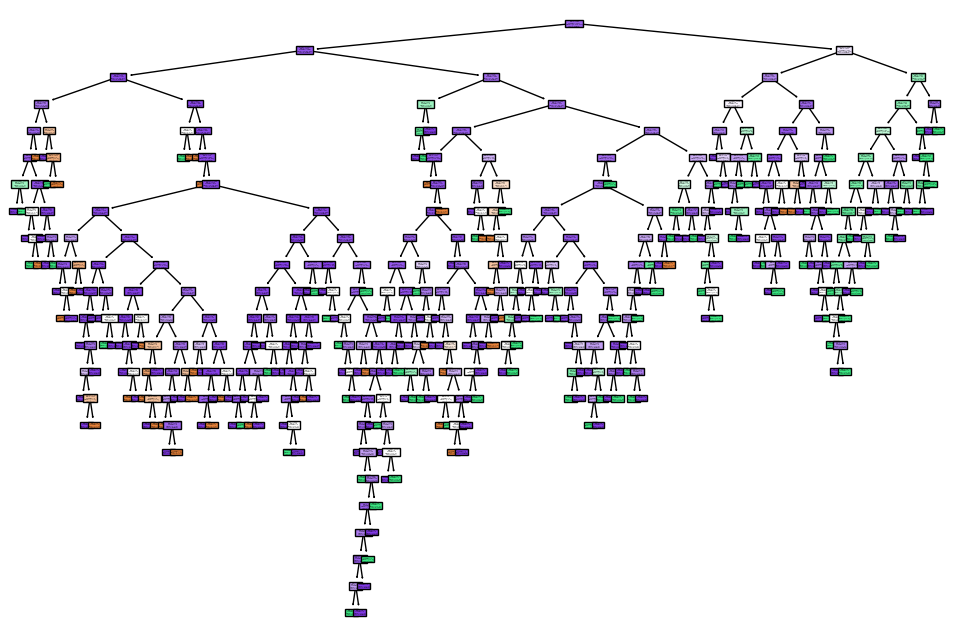

In [86]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

In [79]:
y_pred = clf.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

         bad       0.06      0.09      0.07        11
       great       0.55      0.62      0.58        47
      medium       0.89      0.85      0.87       262

    accuracy                           0.79       320
   macro avg       0.50      0.52      0.51       320
weighted avg       0.81      0.79      0.80       320



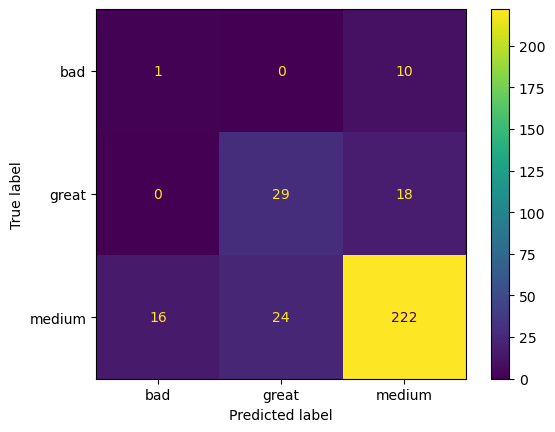

In [84]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()